In [9]:
import os
import sys 
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'Python File')))
from constants import K_o, g_K1,E_K,E_Na,F,R,T
import numpy as np


In [10]:
K1_o = K_o 

def I_K1(V):
    term1 = 48 / (np.exp((V + 37) / 25) + np.exp((V + 37) / -25)) + 10
    term2 = 0.0001 / (1 + np.exp((V - E_K - 76.77) / 17))
    term3 = g_K1 * (V - E_K - 1.73) / (1 + np.exp(1.613 * F * (V - E_K - 1.73) / (R * T))) / (1 + np.exp(K1_o - 0.9988 / -0.124))
    return term1 * term2 + term3


C:\Users\black\AppData\Local\Temp\ipykernel_23016\908382586.py:5: RuntimeWarning: overflow encountered in exp
  term2 = 0.0001 / (1 + np.exp((V - E_K - 76.77) / 17))
C:\Users\black\AppData\Local\Temp\ipykernel_23016\908382586.py:6: RuntimeWarning: overflow encountered in exp
  term3 = g_K1 * (V - E_K - 1.73) / (1 + np.exp(1.613 * F * (V - E_K - 1.73) / (R * T))) / (1 + np.exp(K1_o - 0.9988 / -0.124))


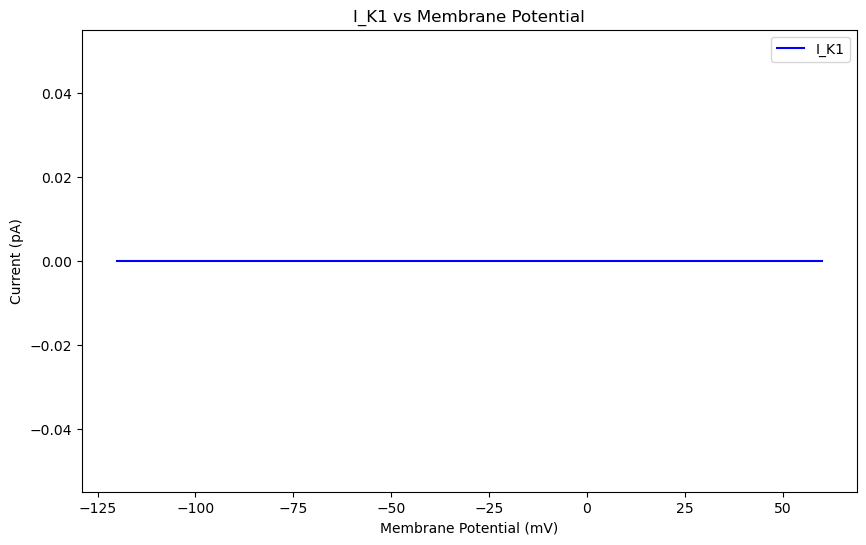

In [11]:
# Voltage range
V_range = np.linspace(-120, 60, 100)

# Calculate currents
I_K1_values = [I_K1(V) for V in V_range]


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(V_range, I_K1_values, label='I_K1', color='blue')
plt.xlabel('Membrane Potential (mV)')
plt.ylabel('Current (pA)')
plt.title('I_K1 vs Membrane Potential')
plt.legend()
plt.show()
